# RNN Labs

In this lab we will use RNN to accomplish two types of tasks:
- predicting a label to represent a set of words. This will be for us sentiment analysis but it could also have been topic modeling.
- predict a label for each word. It will be for us naming entity recognition (NER) but it could also have been part of speech tagging (POS).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Case-Study:-RNN-for-Sentiment-Analysis" data-toc-modified-id="Case-Study:-RNN-for-Sentiment-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Case Study: RNN for Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#Read-the-dataset" data-toc-modified-id="Read-the-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read the dataset</a></span></li><li><span><a href="#Text-normalisation" data-toc-modified-id="Text-normalisation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Text normalisation</a></span></li><li><span><a href="#Prepare-dataset-for-word-embedding-with-Keras" data-toc-modified-id="Prepare-dataset-for-word-embedding-with-Keras-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Prepare dataset for word embedding with Keras</a></span></li><li><span><a href="#Build-RNN-neural-network" data-toc-modified-id="Build-RNN-neural-network-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Build RNN neural network</a></span><ul class="toc-item"><li><span><a href="#Stage-1---use-last-hidden-state" data-toc-modified-id="Stage-1---use-last-hidden-state-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Stage 1 - use last hidden state</a></span></li><li><span><a href="#Stage-2---use-mean-of-all-hidden-state" data-toc-modified-id="Stage-2---use-mean-of-all-hidden-state-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Stage 2 - use mean of all hidden state</a></span></li><li><span><a href="#Stage-3---build-a-bi-directional-recurrent-network-and-use-all-hidden-state" data-toc-modified-id="Stage-3---build-a-bi-directional-recurrent-network-and-use-all-hidden-state-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Stage 3 - build a bi-directional recurrent network and use all hidden state</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Case-Study:-RNN-for-Naming-Entity-Recognition" data-toc-modified-id="Case-Study:-RNN-for-Naming-Entity-Recognition-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Case Study: RNN for Naming Entity Recognition</a></span><ul class="toc-item"><li><span><a href="#Read-the-dataset" data-toc-modified-id="Read-the-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read the dataset</a></span></li><li><span><a href="#Build-train-and-test-set" data-toc-modified-id="Build-train-and-test-set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Build train and test set</a></span></li><li><span><a href="#Encode-the-train-and-test-set" data-toc-modified-id="Encode-the-train-and-test-set-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Encode the train and test set</a></span></li><li><span><a href="#A-first-model-with-LSTM-cell" data-toc-modified-id="A-first-model-with-LSTM-cell-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>A first model with LSTM cell</a></span><ul class="toc-item"><li><span><a href="#Build-the-network" data-toc-modified-id="Build-the-network-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Build the network</a></span></li><li><span><a href="#Fit-the-network" data-toc-modified-id="Fit-the-network-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Fit the network</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Evaluate the model</a></span></li></ul></li><li><span><a href="#A-second-model-with-stacked-layers-of-Bi-LSTM-cell" data-toc-modified-id="A-second-model-with-stacked-layers-of-Bi-LSTM-cell-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>A second model with stacked layers of Bi-LSTM cell</a></span><ul class="toc-item"><li><span><a href="#Build-the-network" data-toc-modified-id="Build-the-network-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Build the network</a></span></li><li><span><a href="#Fit-the-network" data-toc-modified-id="Fit-the-network-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Fit the network</a></span></li><li><span><a href="#Evaluate-the-model" data-toc-modified-id="Evaluate-the-model-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Evaluate the model</a></span></li></ul></li><li><span><a href="#Conclusion-about-RNN-approach-for-NER" data-toc-modified-id="Conclusion-about-RNN-approach-for-NER-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Conclusion about RNN approach for NER</a></span></li></ul></li><li><span><a href="#Come-back-to-your-favourite-sentence..." data-toc-modified-id="Come-back-to-your-favourite-sentence...-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Come back to your favourite sentence...</a></span></li></ul></div>

## Case Study: RNN for Sentiment Analysis

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)


The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.
The work to be done is as follows:

1. Feature extraction and baseline (BOW + logistic regression)
    * read the dataset and understand it
    * put it in a format so that you can use `CountVectorizer` or`Tf-IDF` to extract the desired features
    * perform on the desired dates and preprocessing
    * use one of the classifiers you know to predict the polarity of different sentences
1. Word embedding
    * stage 1 build a network that uses Keras' embedding which is not language sensitive.
    * stage 1 try to use an existing embedding (https://github.com/facebookresearch/MUSE)
 
1. <span style="color:red">Recurrent neural network
    * <span style="color:red">stage 1: build a network that uses recurrent neurons. The classification will be done on the last hidden state 
    * <span style="color:red">stage 2: build a network that uses recurrent neurons. The classification will be done on the mean of all hidden state
    * <span style="color:red">stage 3: build a bi-directional network that uses recurrent neurons. The classification will be done on the mean of all hidden state
    </span>



**WARNING:** the dataset is voluminous, I can only encourage you to work first on a small part of it and only at the end, when the code is well debugged and that it is necessary to build the "final model", to use the whole dataset.
    
As for the previous labs, I propose you a first version so that you don't lose too much time to start. Take the time to understand the lines of code and ask questions if necessary. Beware, as usual the hyper-parameters are a bit crazy.

### Read the dataset

Could you find below a proposal. You can complete them.

In [1]:
import pandas as pd
import numpy as np

In [2]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0


In [3]:
''' Construct X_train and y_train '''
X_train = TRAIN['Reviews']
y_train = TRAIN['Rating']-min(TRAIN['Rating'])

nb_classes = len(np.unique(y_train))

X_train.shape, y_train.shape, np.unique(y_train)

((5000,), (5000,), array([0, 1, 2, 3, 4]))

In [4]:
''' Do the same for test '''
X_test = TEST['Reviews']
y_test = TEST['Rating']-min(TRAIN['Rating'])

### Text normalisation

It's your job

* you can put all the text in lower case
* you can remove all english stop word
* you can remove all/some punctuation sign
* you can remove all number
* you can stem/lemmatize the english word
* ...

You can of course re-use the previously used preprocessing but also do nothing to spend essentially time on the first two approaches to using text with neural networks.

In [5]:
''' Put your code here '''
import nltk # nltk.download()
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

def stem_sentences(sentence):
    """
    Performs stemming on a sentence
    """
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stemmed_sentence = []
    for word in token_words: stemmed_sentence.append(porter.stem(word))
    return " ".join(stemmed_sentence)

def lem_sentences(sentence):
    """
    Performs lemmatization on a sentence
    """
    lemmatizer = WordNetLemmatizer()
    token_words = word_tokenize(sentence)
    stemmed_sentence = []
    for word in token_words: stemmed_sentence.append(lemmatizer.lemmatize(word))
    return " ".join(stemmed_sentence)

def normalize_set(dataset, normalization="stem"):
    """
    Normalizes a dataset
    """
    for idx, entry in enumerate(dataset):
        if normalization == "stem": dataset[idx] = stem_sentences(entry)
        else: dataset[idx] = lem_sentences(entry)
    return dataset
''' After this stage '''

# X_train_norm contain normalized text for X_train
# X_test_norm contain normalized text for X_test
X_train_norm = X_train.copy()
X_train_norm = normalize_set(X_train_norm)
X_test_norm = X_test.copy()
X_test_norm = normalize_set(X_test_norm)
# ''' After this stage '''
# # X_train_norm contain normalized text for X_train
# # X_test_norm contain normalized text for X_test
# X_train_norm = X_train
# X_test_norm = X_test

### Prepare dataset for word embedding with Keras 

Could you find below a proposal. You can complete them.

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

FILTERS='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
VOCABULARY_SIZE = 20 # Max the vocabulary size

# create the tokenizer
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE,
              filters=FILTERS,
              lower=True,
              split=' ',
              oov_token="_UNK_")

# fit the tokenizer on the documents
tokenizer.fit_on_texts(X_train_norm)
print('Found %s unique tokens.' % len(tokenizer.word_index))

# encode documents
X_train_enc = tokenizer.texts_to_sequences(X_train_norm)
X_test_enc = tokenizer.texts_to_sequences(X_test_norm)
X_train_enc[0]

Found 7170 unique tokens.


[3, 1, 4, 3, 1, 1, 4, 1]

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

SEQUENCE_SIZE = 10     # Nombre de mots dans une review
PADDING_MODE = 'pre'
PADDING_VALUE = 0
TRUNCATING_MODE='post'

X_train_enc = pad_sequences(X_train_enc,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)
X_test_enc = pad_sequences(X_test_enc,
                            maxlen=SEQUENCE_SIZE,
                            padding=PADDING_MODE,
                            truncating=TRUNCATING_MODE,
                            value=PADDING_VALUE)
X_train_enc[0]

array([0, 0, 3, 1, 4, 3, 1, 1, 4, 1], dtype=int32)

In [8]:
from tensorflow.keras.layers import Embedding
# Representation

print(X_train[0], len(X_train[0]),"\n",sep="\n")
print(X_train_norm[0], len(X_train_norm[0]),"\n",sep="\n")
print(X_train_enc[0], len(X_train_enc[0]),"\n",sep="\n")

# Word embedding
EMBEDDING_SIZE = 8
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(X_train_enc[0])

print(embedding, VOCABULARY_SIZE, EMBEDDING_SIZE, SEQUENCE_SIZE, embedding.shape,"\n",sep="\n")

I love it!!! I absolutely love it!! 👌👍
38


I love it ! ! ! I absolut love it ! ! 👌👍
40


[0 0 3 1 4 3 1 1 4 1]
10


tf.Tensor(
[[ 0.0336459   0.00792699  0.00985565 -0.02797627 -0.04203873 -0.03601792
   0.02356464  0.04938502]
 [ 0.0336459   0.00792699  0.00985565 -0.02797627 -0.04203873 -0.03601792
   0.02356464  0.04938502]
 [ 0.00490399 -0.02520524  0.03118149 -0.03093857 -0.02968099  0.01672301
  -0.01217049  0.04499373]
 [-0.02470164  0.0408507   0.02439648  0.01821465 -0.03139542  0.01880132
   0.00226671 -0.03238057]
 [ 0.03756685  0.0305495  -0.01773541  0.02535192  0.02448918 -0.03433082
  -0.00378763  0.04593003]
 [ 0.00490399 -0.02520524  0.03118149 -0.03093857 -0.02968099  0.01672301
  -0.01217049  0.04499373]
 [-0.02470164  0.0408507   0.02439648  0.01821465 -0.03139542  0.01880132
   0.00226671 -0.03238057]
 [-0.02470164  0.0408507   0.02439648  0.01821465 -0.03139542  0.01880132
   0.00226671 -0.03238057]
 [ 0.03756685  0.0305495  -0.01773541  0.02535192  0.02448918 -0

### Build RNN neural network

#### Stage 1 - use last hidden state
<span style="color:red">stage 1: build a network that uses recurrent neurons. The classification will be done on the last hidden state.</span>

![image](https://www.researchgate.net/profile/Huy_Tien_Nguyen/publication/321259272/figure/fig2/AS:572716866433034@1513557749934/Illustration-of-our-LSTM-model-for-sentiment-classification-Each-word-is-transfered-to-a.png)

Could you find below a proposal. You can complete them.

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, LSTM, AveragePooling1D, GlobalAveragePooling1D
from tensorflow.keras import utils

EMBEDDING_SIZE = 8
return_sequences = False

# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)

# an RNN layer
output_1 = LSTM(64, return_sequences=False, activation='relu')(embedding)

# some Dense layers
output_2 = Dense(8, activation='relu')(output_1)

#output layer
predictions = Dense(nb_classes, activation='softmax')(output_2)

# build model
model = Model(inputs=inputs, outputs=predictions)

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 10, 8)             160       
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                18688     
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 45        
Total params: 19,413
Trainable params: 19,413
Non-trainable params: 0
_________________________________________________________________


In [30]:
''' Fit your network - don't forget the use of EarlyStopping and other callbacks.'''

es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', patience=5, restore_best_weights=True, verbose=1)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True, verbose=1)

# fit model
history = model.fit(X_train_enc, y_train, validation_split=0.1, epochs=4000, callbacks=[es, mc], verbose=1)

Epoch 1/4000
141/141 [==============================] - 2s 6ms/step - loss: 1.4533 - acc: 0.5018 - val_loss: 1.2155 - val_acc: 0.5660

Epoch 00001: val_acc improved from -inf to 0.56600, saving model to best_model.h5
Epoch 2/4000
141/141 [==============================] - 1s 5ms/step - loss: 1.2243 - acc: 0.5410 - val_loss: 1.1993 - val_acc: 0.5660

Epoch 00002: val_acc did not improve from 0.56600
Epoch 3/4000
141/141 [==============================] - 1s 6ms/step - loss: 1.2152 - acc: 0.5319 - val_loss: 1.1894 - val_acc: 0.5700

Epoch 00003: val_acc improved from 0.56600 to 0.57000, saving model to best_model.h5
Epoch 4/4000
141/141 [==============================] - 1s 6ms/step - loss: 1.1984 - acc: 0.5508 - val_loss: 1.2146 - val_acc: 0.5700

Epoch 00004: val_acc did not improve from 0.57000
Epoch 5/4000
141/141 [==============================] - 1s 6ms/step - loss: 1.2097 - acc: 0.5594 - val_loss: 1.1972 - val_acc: 0.5680

Epoch 00005: val_acc did not improve from 0.57000
Epoch 6/

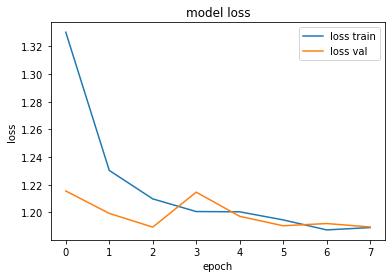

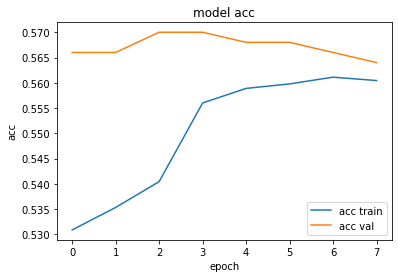

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot history
# list all data in history

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss train', 'loss val'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc train', 'acc val'], loc='best')
plt.show()

In [32]:
''' Evaluate your result '''
''' Le jeu de donnée n'est pas très équilibré '''
from sklearn.metrics import f1_score, accuracy_score

y_pred = model.predict(X_test_enc)
y_pred = np.argmax(y_pred, axis=1)

# print(y_pred.shape, y_test.shape, X_test_enc.shape)

"acc=", accuracy_score(y_pred, y_test), "f1", f1_score(y_pred, y_test, average="weighted")

('acc=', 0.577, 'f1', 0.7014035445793788)

#### Stage 2 - use mean of all hidden state

* <span style="color:red">stage 2: build a network that uses recurrent neurons. The classification will be done on the mean of all hidden state

    ![image](https://d3i71xaburhd42.cloudfront.net/db689ec8145af54dc23ecc232735b28adc38d45a/3-Figure3-1.png)
    
**Attention** in the diagram above a bi-LSTM is used. This will be the case in our third version. Use only the Forward layer.

In [44]:
''' Put your work here '''

# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)
# an RNN layer
output_1 = LSTM(32, return_sequences=True, activation='relu')(embedding)
#output layer
average_1 = AveragePooling1D()(output_1)
output_2 = Flatten()(average_1)
#output layer
predictions = Dense(nb_classes, activation='softmax')(output_2)
# build model
model = Model(inputs=inputs, outputs=predictions)
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
embedding_25 (Embedding)     (None, 10, 8)             160       
_________________________________________________________________
lstm_24 (LSTM)               (None, 10, 32)            5248      
_________________________________________________________________
average_pooling1d_15 (Averag (None, 5, 32)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 805       
Total params: 6,213
Trainable params: 6,213
Non-trainable params: 0
________________________________________________________

In [45]:
''' Fit your network - don't forget the use of EarlyStopping and other callbacks.'''

es = tf.keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', patience=5, restore_best_weights=True, verbose=1)
mc = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True, verbose=1)

# fit model
history = model.fit(X_train_enc, y_train, validation_split=0.1, epochs=4000, callbacks=[es, mc], verbose=1)

Epoch 1/4000
141/141 [==============================] - 2s 6ms/step - loss: 1.4381 - acc: 0.5216 - val_loss: 1.2163 - val_acc: 0.5660

Epoch 00001: val_acc improved from -inf to 0.56600, saving model to best_model.h5
Epoch 2/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.2325 - acc: 0.5347 - val_loss: 1.2013 - val_acc: 0.5660

Epoch 00002: val_acc did not improve from 0.56600
Epoch 3/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.2018 - acc: 0.5519 - val_loss: 1.2034 - val_acc: 0.5720

Epoch 00003: val_acc improved from 0.56600 to 0.57200, saving model to best_model.h5
Epoch 4/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.1834 - acc: 0.5634 - val_loss: 1.1969 - val_acc: 0.5660

Epoch 00004: val_acc did not improve from 0.57200
Epoch 5/4000
141/141 [==============================] - 1s 4ms/step - loss: 1.1677 - acc: 0.5691 - val_loss: 1.1937 - val_acc: 0.5680

Epoch 00005: val_acc did not improve from 0.57200
Epoch 6/

In [46]:
''' Evaluate your result '''
''' Le jeu de donnée n'est pas très équilibré '''
from sklearn.metrics import f1_score, accuracy_score

y_pred = model.predict(X_test_enc)
y_pred = np.argmax(y_pred, axis=1)

# print(y_pred.shape, y_test.shape, X_test_enc.shape)

"acc=", accuracy_score(y_pred, y_test), "f1", f1_score(y_pred, y_test, average="weighted")

('acc=', 0.581, 'f1', 0.6931222988505746)

#### Stage 3 - build a bi-directional recurrent network and use all hidden state

* <span style="color:red">stage 3: build a bi-directional recurrent network and all hidden state as an input of a classifier.
    
![image](https://mlwhiz.com/images/birnn.png)

In [53]:
''' Put your work here '''
from tensorflow.keras.layers import Bidirectional

# This returns a tensor
inputs = Input(shape=(SEQUENCE_SIZE,))

# Word embedding
embedding = Embedding(VOCABULARY_SIZE,
                      EMBEDDING_SIZE,
                      input_length=SEQUENCE_SIZE)(inputs)
#LSTM layer
output_1 = Bidirectional(LSTM(128, return_sequences=True, activation='relu'))(embedding)
# output_2 = Bidirectional(LSTM(128, return_sequences=True, activation='relu'))(output_1)
# output_3 = Bidirectional(LSTM(128, return_sequences=True, activation='relu'))(output_2)
#Average layer
average_1 = AveragePooling1D()(output_1)
output_4 = Flatten()(average_1)
#Dense layer
dense = Dense(256, activation='relu')(output_4)
#Output layer
predictions = Dense(nb_classes, activation='softmax')(dense)

# build model
model = Model(inputs=inputs, outputs=predictions)
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
embedding_29 (Embedding)     (None, 10, 8)             160       
_________________________________________________________________
bidirectional_5 (Bidirection (None, 10, 256)           140288    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 10, 256)           394240    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 10, 256)           394240    
_________________________________________________________________
average_pooling1d_18 (Averag (None, 5, 256)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1280)              0  

In [54]:
''' Fit your network - don't forget the use of EarlyStopping and other callbacks.'''

es = tf.keras.callbacks.EarlyStopping(
    monitor='val_acc', 
    mode='max', 
    patience=5, 
    restore_best_weights=True, 
    verbose=1
)
mc = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', 
    monitor='val_acc', 
    mode='max', 
    save_best_only=True, 
    verbose=1
)

# fit model
history = model.fit(X_train_enc, y_train, validation_split=0.1, epochs=4000, callbacks=[es, mc], verbose=1)

Epoch 1/4000
141/141 [==============================] - 11s 47ms/step - loss: 1.3414 - acc: 0.5291 - val_loss: 1.2270 - val_acc: 0.5660

Epoch 00001: val_acc improved from -inf to 0.56600, saving model to best_model.h5
Epoch 2/4000
141/141 [==============================] - 6s 42ms/step - loss: 1.2248 - acc: 0.5317 - val_loss: 1.1990 - val_acc: 0.5760

Epoch 00002: val_acc improved from 0.56600 to 0.57600, saving model to best_model.h5
Epoch 3/4000
141/141 [==============================] - 6s 43ms/step - loss: 1.1975 - acc: 0.5660 - val_loss: 1.2024 - val_acc: 0.5700

Epoch 00003: val_acc did not improve from 0.57600
Epoch 4/4000
141/141 [==============================] - 6s 42ms/step - loss: 1.1920 - acc: 0.5661 - val_loss: 1.2002 - val_acc: 0.5660

Epoch 00004: val_acc did not improve from 0.57600
Epoch 5/4000
141/141 [==============================] - 6s 41ms/step - loss: 1.1977 - acc: 0.5630 - val_loss: 1.2463 - val_acc: 0.5440

Epoch 00005: val_acc did not improve from 0.57600
Ep

In [55]:
''' Evaluate your result '''
''' Le jeu de donnée n'est pas très équilibré '''
from sklearn.metrics import f1_score, accuracy_score

y_pred = model.predict(X_test_enc)
y_pred = np.argmax(y_pred, axis=1)

# print(y_pred.shape, y_test.shape, X_test_enc.shape)

"acc=", accuracy_score(y_pred, y_test), "f1", f1_score(y_pred, y_test, average="weighted")

('acc=', 0.588, 'f1', 0.704480133884826)

### Conclusion

Compare the three approaches with the previous results.

## Case Study: RNN for Naming Entity Recognition

Named entity recognition (NER) ‒ also called entity identification or entity extraction ‒ is an AI technique that automatically identifies named entities in a text and classifies them into predefined categories. Entities can be names of people, organizations, locations, times, quantities, monetary values, percentages, and more.

Extracting these entities helps businesses easily analyze huge amounts of unstructured data, like emails, open-ended survey responses, social media conversations, and more.

![image](https://monkeylearn.com/static/d0575562cdedb47340c00662c5c1b859/80132/Example.png)

### Read the dataset

In [66]:
train_data = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/NER/ner_train_dataset.csv.gz", encoding="latin1")
test_data = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/NER/ner_test_dataset.csv.gz", encoding="latin1")
train_data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [67]:
train_data = train_data.fillna(method="ffill")
test_data = test_data.fillna(method="ffill")
train_data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


For NER or POS tasks, pre-processing is generally not done except to standardize the text a little:
- correction of typing errors
- homogenization of dates and telephone numbers
- lower case setting of the text

but very generally, we do not do stemming or lemmatization.

### Build train and test set

In [68]:
class RetrieveSentance(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        function = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(function)
        self.sentences = [s for s in self.grouped]
    
    def retrieve(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [86]:
train = RetrieveSentance(train_data)
test = RetrieveSentance(test_data)

In [87]:
# Build train set (X)
X_train = [[s[0].lower() for s in sent] for sent in train.sentences]
# X_train[0]
X_test = [[s[0].lower() for s in sent] for sent in test.sentences]
# X_test[0]

In [88]:
# Build train set (y)
y_train = [[s[2] for s in sent] for sent in train.sentences]
# y_train[0]
y_test = [[s[2] for s in sent] for sent in test.sentences]

In [96]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

14999 14999 15000 15000


In [89]:
assert len(X_train)==len(y_train)
assert len(X_test)==len(y_test)

In [109]:
# Defines the vocabulary
import itertools

WORDS = set(itertools.chain(*X_train))
TAGS = sorted(set(itertools.chain(*y_train)))
vocab_size = len(WORDS)+2 # "UNK" and "PAD"
nb_classes = len(TAGS)+1  # "PAD"

In [110]:
print("="*40)
print("vocabulary size:", vocab_size)
print("class number:", nb_classes)
print("number sentences in train", len(X_train))

vocabulary size: 18342
class number: 18
number sentences in train 14999


### Encode the train and test set

In [100]:
# word is key and its value is corresponding index
word2idx = {w : i + 2 for i, w in enumerate(WORDS)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0

# Dictionary label:index pair
# label is key and value is index.
tag2idx = {t : i + 1 for i, t in enumerate(TAGS)}
tag2idx["PAD"] = 0

# Build reverse dictionnary
idx2word = {i: w for w, i in word2idx.items()}
idx2tag = {i: w for w, i in tag2idx.items()}

In [101]:
#Folds each sentence that is longer than LINE_SIZE
def folds_sentences(X, y, size=60):
    X2 = []
    y2 = []
    for x_sent, t_sent in zip(X, y):
        X_ = []
        y_ = []
        for x, y in zip(x_sent, t_sent):
            if len(X_)==size:
                # We've reached the maximum size for one line, so we're starting a new line.
                X2 += [X_]
                y2 += [y_]
                X_ = [x]
                y_ = [y]
            else:
                X_ += [x]
                y_ += [y]
        X2 += [X_]
        y2 += [y_]
    return X2, y2

In [102]:
# Converts each sentence into list of index
def encode_sentences(S, dictionnary):
    return [[dictionnary[w] if w in dictionnary.keys() else dictionnary["UNK"] for w in s] for s in S]

In [103]:
# Adds padding
def add_padding(S, size, pad_id=0):
    return tf.keras.preprocessing.sequence.pad_sequences(maxlen=size, sequences=S, padding="post", value=pad_id)

In [104]:
# Do all at the same time
import tensorflow as tf

LINE_SIZE = 10

def embed_sentences(X, y, word2idx, tag2idx, size=60):
    X, y = folds_sentences(X, y, LINE_SIZE)
    X_enc = encode_sentences(X, word2idx)
    y_enc = encode_sentences(y, tag2idx)
    X_enc = add_padding(X_enc, size, word2idx["PAD"])
    y_enc = add_padding(y_enc, size, tag2idx["PAD"])    
    return X_enc, y_enc

X_train_enc, y_train_enc = embed_sentences(X_train, y_train, word2idx, tag2idx, LINE_SIZE)

In [105]:
X_train_enc.shape, y_train_enc.shape

((39471, 10), (39471, 10))

In [106]:
# Let's check the first sentence before and after processing.
print('*****Before Processing first sentence: *****\n', ' '.join([w for w in X_train[0]]))
print('*****After Processing first sentence: *****\n ', X_train_enc[0])

*****Before Processing first sentence: *****
 thousands of demonstrators have marched through london to protest the war in iraq and demand the withdrawal of british troops from that country .
*****After Processing first sentence: *****
  [ 5987  9626  7415  3213   269  4497 17469 13506 15349 15382]


In [107]:
# First sentence label before and after processing.
print('*****Before Processing first sentence: *****\n', ' '.join([w for w in y_train[0]]))
print('*****After Processing first sentence: *****\n ', y_train_enc[0])

*****Before Processing first sentence: *****
 O O O O O O B-geo O O O O O B-geo O O O O O B-gpe O O O O O
*****After Processing first sentence: *****
  [17 17 17 17 17 17  3 17 17 17]


In [111]:
''' You can do the same for test set '''
X_test_enc, y_test_enc = embed_sentences(X_test, y_test, word2idx, tag2idx, LINE_SIZE)

### A first model with LSTM cell

![image](https://confusedcoders.com/wp-content/uploads/2019/12/many_to_many.png)

#### Build the network

In [112]:
def build_network(input_size, nb_classes,
                  EMBEDDING_SIZE=50, RNN_SIZE=25, DENSE_SIZE=50, DROPOUT = 0.2):

    inputs = tf.keras.layers.Input(shape=(input_size,))
    embed = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_SIZE, input_length=input_size, mask_zero=True)(inputs)
    lstm = tf.keras.layers.LSTM(units=RNN_SIZE, return_sequences=True, recurrent_dropout=DROPOUT)(embed)
    dense = tf.keras.layers.Dense(DENSE_SIZE, activation='relu')(lstm)
    dense = tf.keras.layers.Dense(DENSE_SIZE//4, activation='relu')(dense)
    output = tf.keras.layers.Dense(nb_classes, activation='softmax')(dense)
    return tf.keras.models.Model(inputs, output)

In [113]:
model = build_network(LINE_SIZE, nb_classes)
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
embedding_30 (Embedding)     (None, 10, 50)            917100    
_________________________________________________________________
lstm_33 (LSTM)               (None, 10, 25)            7600      
_________________________________________________________________
dense_21 (Dense)             (None, 10, 50)            1300      
_________________________________________________________________
dense_22 (Dense)             (None, 10, 12)            612       
_________________________________________________________________
dense_23 (Dense)             (None, 10, 18)            234       
Total params: 926,846
Trainable params: 926,846
Non-trainable params: 0
____________________________________________________

#### Fit the network

In [114]:
def fit_network(model, X, y, BATCH_SIZE, loss, metrics):
    epochs=3

    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', restore_best_weights=True, verbose=1, patience=5)
    mc = tf.keras.callbacks.ModelCheckpoint('best_model_lstm.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

    model.compile(optimizer='adam', loss=loss, metrics=metrics)
    return model.fit(X, y,
                      batch_size= BATCH_SIZE,
                      epochs=epochs,
                      validation_split=0.1,
                      callbacks=[mc, es])

In [115]:
BATCH_SIZE = 16

history = fit_network(model,
                      X_train_enc, y_train_enc,
                      BATCH_SIZE,
                      tf.keras.backend.sparse_categorical_crossentropy,
                      ['accuracy'])

Epoch 1/3
2221/2221 [==============================] - 31s 13ms/step - loss: 0.6704 - accuracy: 0.8601 - val_loss: 0.2139 - val_accuracy: 0.9298

Epoch 00001: val_accuracy improved from -inf to 0.92984, saving model to best_model_lstm.h5
Epoch 2/3
2221/2221 [==============================] - 28s 13ms/step - loss: 0.1856 - accuracy: 0.9382 - val_loss: 0.1745 - val_accuracy: 0.9398

Epoch 00002: val_accuracy improved from 0.92984 to 0.93979, saving model to best_model_lstm.h5
Epoch 3/3
2221/2221 [==============================] - 28s 13ms/step - loss: 0.1331 - accuracy: 0.9534 - val_loss: 0.1656 - val_accuracy: 0.9428

Epoch 00003: val_accuracy improved from 0.93979 to 0.94276, saving model to best_model_lstm.h5


In [118]:
def plot_learning_curve(history, loss='loss', acc='acc'):
    fig = plt.figure(figsize = (16, 4))

    plt.subplot(121)
    plt.plot(history.history[loss], label='Training loss')
    plt.plot(history.history['val_'+loss], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history[acc], label='Training acc')
    plt.plot(history.history['val_'+acc], label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.show()

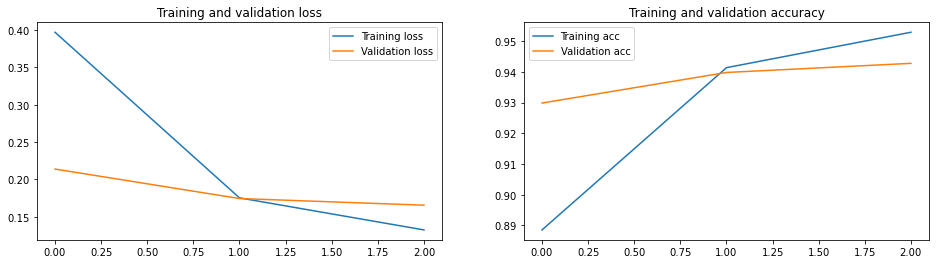

In [119]:
plot_learning_curve(history, 'loss', 'accuracy')

#### Evaluate the model

In [121]:
from seqeval.metrics import f1_score
from seqeval.metrics import classification_report

def evaluate(model, X_enc, y_enc, size):
    def decode(y, dictionnary=idx2tag):
        if len(y.shape)==3:
            y = np.argmax(y, axis=-1)
        return [[dictionnary[i] if dictionnary[i]!="PAD" else "O" for i in row] for row in y]

    y_pred_enc = model.predict(X_enc)
    F1_score = f1_score(y_pred=decode(y_pred_enc), y_true=decode(y_enc))
    print("F1-score is : {:.1%}".format(F1_score))
    
    report = classification_report(y_pred=decode(y_pred_enc), y_true=decode(y_enc))
    print(report)

In [122]:
evaluate(model, X_test_enc, y_test_enc, LINE_SIZE)

F1-score is : 68.2%


/home/qlr/anaconda3/lib/python3.8/site-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         art       0.00      0.00      0.00       117
         eve       0.00      0.00      0.00        95
         geo       0.71      0.82      0.76     12166
         gpe       0.94      0.91      0.92      4738
         nat       0.00      0.00      0.00        49
         org       0.36      0.32      0.34      6610
         per       0.63      0.57      0.60      5645
         tim       0.80      0.74      0.76      6632

   micro avg       0.68      0.68      0.68     36052
   macro avg       0.43      0.42      0.42     36052
weighted avg       0.67      0.68      0.67     36052



### A second model with stacked layers of Bi-LSTM cell

Do the same with BI-LSTM cell. Eventually, use more than one Bi-LSTM layers

![image](https://www.researchgate.net/profile/Robert_Gao/publication/325564535/figure/fig2/AS:690279778615307@1541586932678/Diagram-of-a-two-layer-bi-directional-LSTM-network.png)

#### Build the network

In [127]:
def build_network(input_size, nb_classes,
                  EMBEDDING_SIZE=50, 
                  RNN_SIZE=25, 
                  DENSE_SIZE=50, 
                  DROPOUT = 0.2):
    inputs = tf.keras.layers.Input(shape=(input_size,))
    embed = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_SIZE, input_length=input_size, mask_zero=True)(inputs)
    lstm1 = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(units=RNN_SIZE, return_sequences=True, recurrent_dropout=DROPOUT),
        merge_mode="concat"
    )(embed)
    lstm2 = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(units=RNN_SIZE, return_sequences=True, recurrent_dropout=DROPOUT),
        merge_mode="concat"
    )(lstm1)
    dense = tf.keras.layers.Dense(DENSE_SIZE, activation='relu')(lstm2)
    dense = tf.keras.layers.Dense(DENSE_SIZE//4, activation='relu')(dense)
    output = tf.keras.layers.Dense(nb_classes, activation='softmax')(dense)
    return tf.keras.models.Model(inputs, output)

model = build_network(LINE_SIZE, nb_classes)
model.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
embedding_35 (Embedding)     (None, 10, 50)            917100    
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 10, 50)            15200     
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 10, 50)            15200     
_________________________________________________________________
dense_29 (Dense)             (None, 10, 50)            2550      
_________________________________________________________________
dense_30 (Dense)             (None, 10, 12)            612       
_________________________________________________________________
dense_31 (Dense)             (None, 10, 18)            234

#### Fit the network

In [128]:
BATCH_SIZE = 16

history = fit_network(model,
                      X_train_enc, y_train_enc,
                      BATCH_SIZE,
                      tf.keras.backend.sparse_categorical_crossentropy,
                      ['accuracy'])

Epoch 1/3
2221/2221 [==============================] - 62s 25ms/step - loss: 0.6240 - accuracy: 0.8644 - val_loss: 0.2204 - val_accuracy: 0.9266

Epoch 00001: val_accuracy improved from -inf to 0.92657, saving model to best_model_lstm.h5
Epoch 2/3
2221/2221 [==============================] - 51s 23ms/step - loss: 0.1753 - accuracy: 0.9403 - val_loss: 0.1671 - val_accuracy: 0.9444

Epoch 00002: val_accuracy improved from 0.92657 to 0.94441, saving model to best_model_lstm.h5
Epoch 3/3
2221/2221 [==============================] - 51s 23ms/step - loss: 0.1180 - accuracy: 0.9598 - val_loss: 0.1605 - val_accuracy: 0.9474

Epoch 00003: val_accuracy improved from 0.94441 to 0.94744, saving model to best_model_lstm.h5


#### Evaluate the model

In [129]:
evaluate(model, X_test_enc, y_test_enc, LINE_SIZE)

F1-score is : 36.9%
              precision    recall  f1-score   support

         art       0.00      0.00      0.00       117
         eve       0.00      0.00      0.00        95
         geo       0.12      0.81      0.21     12166
         gpe       0.92      0.93      0.92      4738
         nat       0.00      0.00      0.00        49
         org       0.45      0.43      0.44      6610
         per       0.67      0.57      0.62      5645
         tim       0.80      0.79      0.80      6632

   micro avg       0.25      0.71      0.37     36052
   macro avg       0.37      0.44      0.37     36052
weighted avg       0.50      0.71      0.52     36052



### Conclusion about RNN approach for NER

In [ ]:
The two-layer bidirectional model above has a much lower precision than the simple LSTM one (though it has a higher recall). The difference between 

## Come back to your favourite sentence...

Can you build the embedding of your 5 sentences with a pre-trained embedding using a RNN approach and see if the result is more relevant than before?